In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Se crea una función con tres entradas
def impseq(n0, n1, n2):
  #Se crea un vector que inicie en n1 y termine en n2+1
  n = np.arange(n1,n2+1) 
  #Como se desea hacer un impulso, a n se le va a restar la posicion inicial.
  #X es el vector de datos en el que al valor donde se encuentre el cero se asigna el impulso. 
  #Todos los valores que no sean ceros, son un 'False'.
  x = n-n0 == 0
  return [x,n]

<StemContainer object of 3 artists>

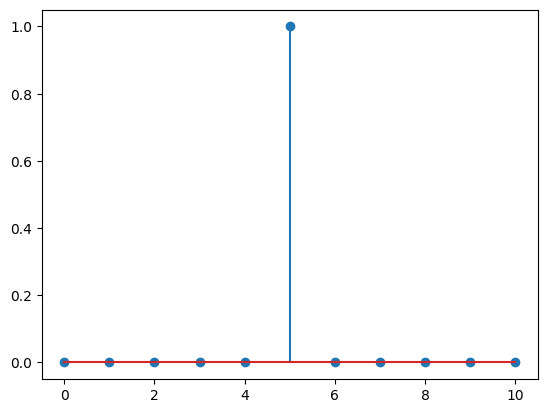

In [2]:
imp1=impseq(5,0,10)
plt.stem(imp1[1],imp1[0])

In [3]:
#Se crea la función escalon con tres entradas.
def escalon(n0, n1, n2):
  n = np.arange(n1,n2+1) 
  #X es un vector donde se asignan los valores mayores o iguales a n0.
  #n0 es el valor donde inicia el escalon.
  #Todos los valores desde n0 se asignan como un 'True'
  x = n >= n0
  return [x,n]

<StemContainer object of 3 artists>

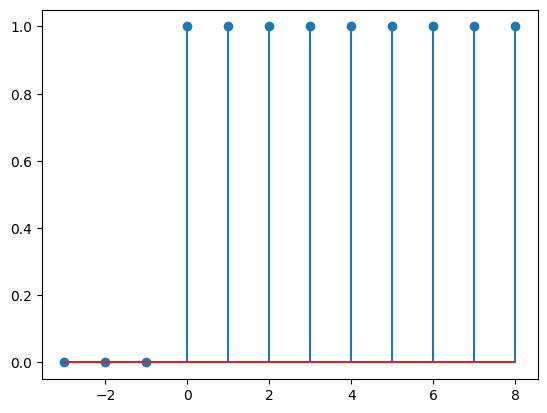

In [4]:
esca=escalon(0,-3,8)
plt.stem(esca[1],esca[0])

In [5]:
#Se define la funcion rampa con tres entradas.
def Rampa(n0,n1,n2):
  n=np.arange(n1,n2+1)
  #La funcion rampa se define como un escalon multiplicado por un impulso.
 # print(n)
  v=n >= n0
 # print(v)
  x=(n-n0)
  #x=x[::-1] # emplear para rampa decreciente 
 # v2=v[::-1]
 # print(x)
  x*=v
  #x*=v2
 # print(x)
  return[x,n]

<StemContainer object of 3 artists>

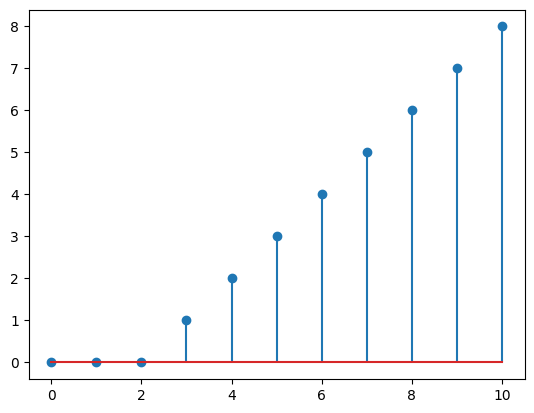

In [6]:
ram=Rampa(2,0,10)
plt.stem(ram[1],ram[0])

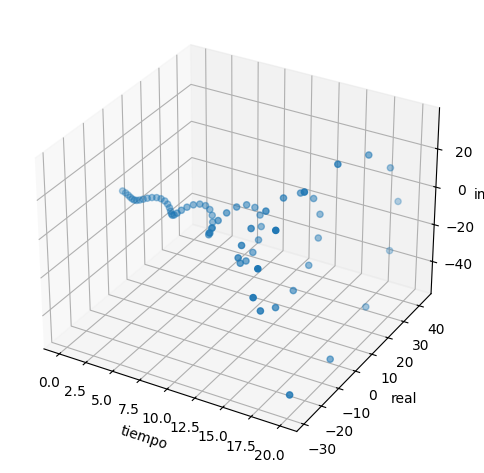

In [7]:

from mpl_toolkits import mplot3d
fig=plt.figure()

#Exponencial compleja 
import numpy as np
import matplotlib.pyplot as plt

def expoc(sigma,omega):
  nn=np.linspace(0,20,70)
  p= np.exp(complex(sigma,omega)*nn)
  return [p.real,p.imag]

b=expoc(0.2,20)
t=np.linspace(0,20,70)
ax=plt.axes(projection="3d")
ax.scatter3D(t,b[0],b[1])
ax.set_xlabel("tiempo")
ax.set_ylabel("real")
ax.set_zlabel("imag")
#ax.view_init(0,150)
fig.tight_layout()

<StemContainer object of 3 artists>

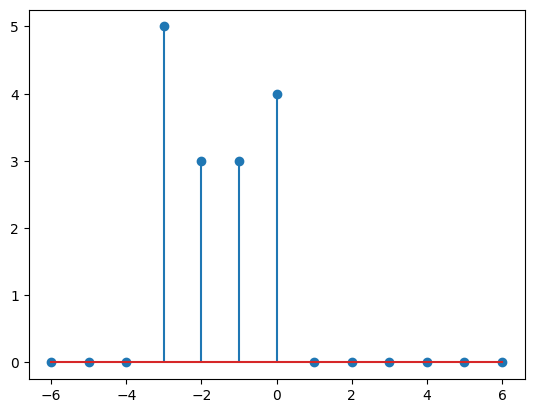

In [8]:
#Se definieron las posiciones iniciales de los impulsos.  
#El dominio es de -6,6, tomado por conveniencia(porque los valores de los impulsos están dentro de ese rango).
aa=impseq(-3,-6,6)
bb=impseq(-1,-6,6)
cc=impseq(-2,-6,6)
dd=impseq(0,-6,6)


#Se define el eje del las abscisas y las ordenadas.
#En el eje de las ordenas se asigna el valor que va a tomar el impulso. 
plt.stem(aa[1],5*aa[0]+3*bb[0]+3*cc[0]+3*dd[0]+dd[0])


<StemContainer object of 3 artists>

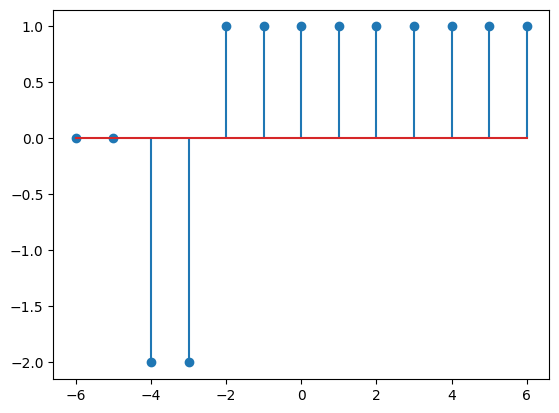

In [9]:
# Se asigna el valor de inicio de los escalones en -4 y -2.
#En el rango de (-6 a 6).
ee=escalon(-4,-6,6)    
ff=escalon(-2,-6,6)

#Se define el eje de las abscisas (-6 a 6) y el eje de las ordenadas.
#Se realiza la suma de los escalones.
plt.stem(ee[1],-2*ee[0]+3*ff[0])

<StemContainer object of 3 artists>

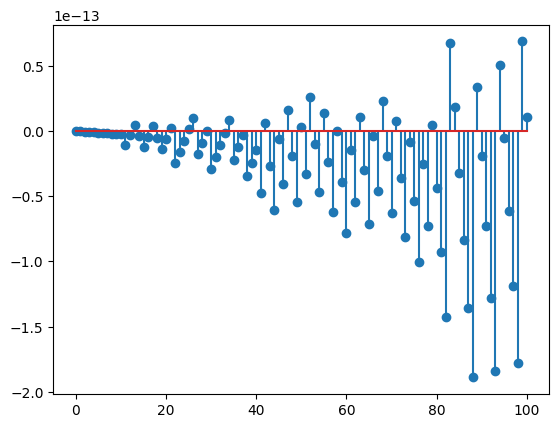

In [10]:
#Se define la función senusoidal con una entrada n.
def sinusoi(n):
  p= np.exp(0.01*n)*np.sin(2*np.pi*n)
  return p

#Se define el intervalo de 0 a 100.
t=np.arange(101)
b=sinusoi(t)
plt.stem(t,b)

#la amplitud de la onda aumenta, debido al signo asociado al indice del exponencial de base e.

<StemContainer object of 3 artists>

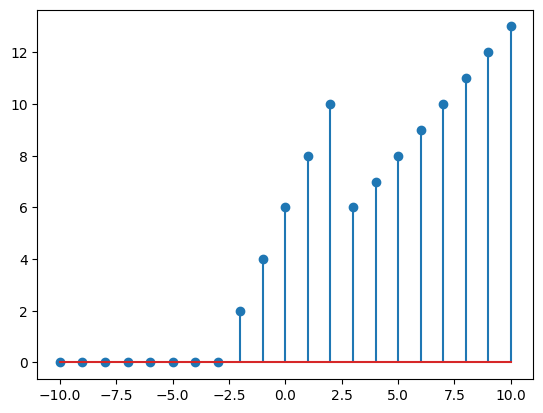

In [11]:
#Se define el punto de inicio de cada rampa.
#El intervalo de rango es de -10 a 10.
ii=escalon(3,-10,10) 
gg=Rampa(-3,-10,10)
hh=Rampa(2,-10,10)


#Se realiza la operación de las rampas.
plt.stem(gg[1],2*gg[0]-hh[0]-5*ii[0])

<StemContainer object of 3 artists>

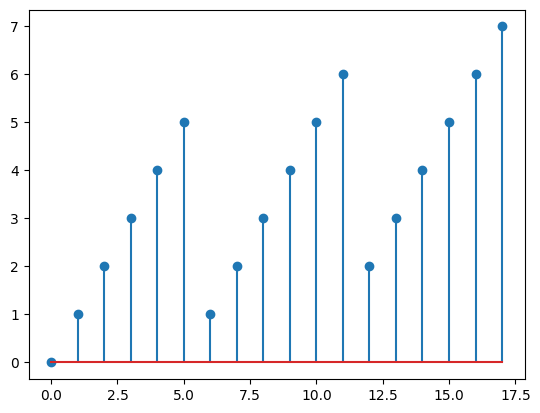

In [12]:
ram1=Rampa(0,0,17)
ram2=Rampa(5,0,17)
ram3=Rampa(10,0,17)
ram1[0]*=(ram1[1]<=5)
ram2[0]*=np.logical_and(ram2[1]<=11,ram2[1]>=6)
ram3[0]*=np.logical_and(ram3[1]<=17,ram3[1]>=12)
#plt.stem(ram3[1],ram3[0])
plt.stem(ram1[1],ram1[0]+ram2[0]+ram3[0])

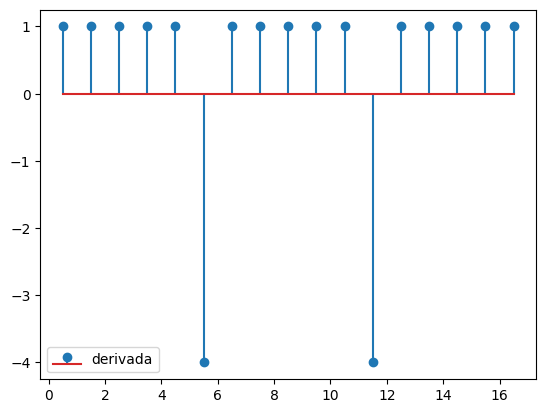

In [13]:
xlist=ram1[1]
ylist=ram1[0]+ram2[0]+ram3[0]
def D(xlist,ylist):
    yprime=np.diff(ylist)/np.diff(xlist)
    xprime=[]
    for i in range(len(yprime)):
        xtemp=(xlist[i+1]+xlist[i])/2 #promedio de valores, fundamentado en teorema del valor medio 
        xprime=np.append(xprime,xtemp)
    return(xprime,yprime)
xprime,yprime=D(xlist,ylist)
plt.stem(xprime,yprime,label="derivada")
plt.legend()

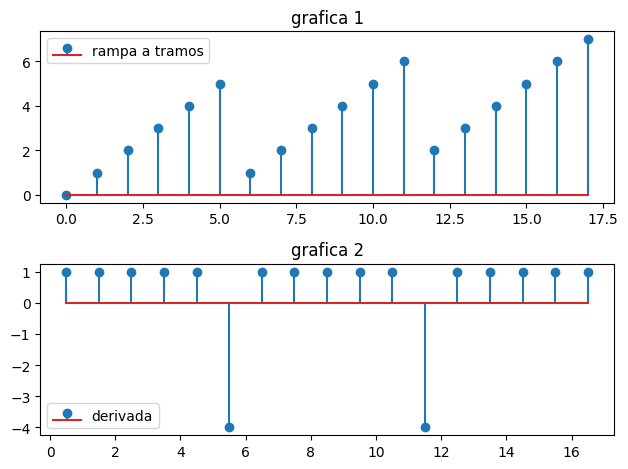

In [14]:
n_rows = 2
n_cols = 1
listanom=[ylist,yprime]
fig, axes = plt.subplots(n_rows, n_cols)

ax = axes[0]
ax.stem(xlist,listanom[0],label="rampa a tramos")
ax.set_title("grafica 1")
ax.legend()
        
ax1 = axes[1]
ax1.stem(xprime,listanom[1],label="derivada")
ax1.set_title("grafica 2")
ax1.legend()

fig.tight_layout()

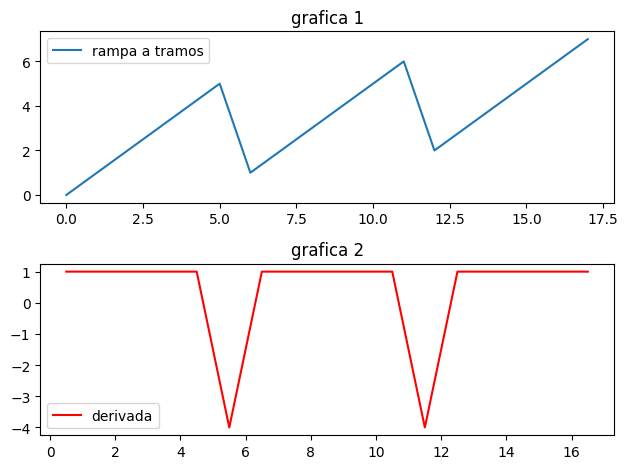

In [15]:
n_rows = 2
n_cols = 1
listanom=[ylist,yprime]
fig, axes = plt.subplots(n_rows, n_cols)

ax = axes[0]
ax.plot(xlist,listanom[0],label="rampa a tramos")
ax.set_title("grafica 1")
ax.legend()
        
ax1 = axes[1]
ax1.plot(xprime,listanom[1],label="derivada",color="red")
ax1.set_title("grafica 2")
ax1.legend()

fig.tight_layout()

como se observa, si se grafica en formato de funcion continua,el grafico de derivadas obtenido no tiene logica, esto se debe a que estas se calcularon en relacion de punto a punto discreto, no conocemos la derivada en cada instante, solo entre dos puntos discretos continuos

In [16]:
#Se define la funcion rampa inversa con 4 entradas.
def Rampainver(n0,n1,n2,n3):
  n=np.arange(n1,n2+1)
 # print(n)
  v=n >= n0
 # print(v)
  x=(n-n0)
 # print(x)
  x*=v
  x=x-np.amax(x)
 #  print(x)
  x*=v
 # print(x)
  x=-1*x-n3
 # print(x)
  x[x<0]=0
 # print(x)

  return[x,n]

<StemContainer object of 3 artists>

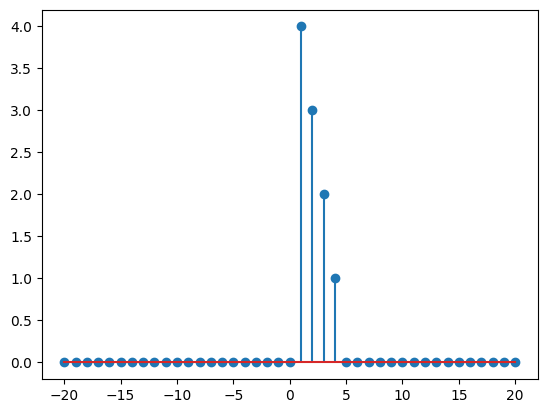

In [17]:
second=Rampainver(1,-20,20,19-4) #para obtener la rampa decreciente desde 4, es necesario colocar n3=0 y luego restarle 4 a la altura maxima 
plt.stem(second[1],second[0])

Punto 5 

<StemContainer object of 3 artists>

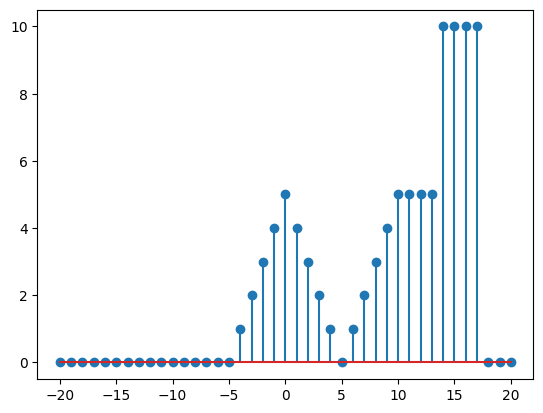

In [18]:
first=Rampa(-5,-20,20)
first[0]*=(first[1]<=0)

third=Rampa(5,-20,20)
third[0]*=(third[1]<=9)

fourth=escalon(10,-20,20)
fourth[0]*=(fourth[1]<=13)

fifth=escalon(14,-20,20)
fifth[0]*=(fifth[1]<=17)

plt.stem(second[1],second[0]+first[0]+third[0]+5*fourth[0]+10*fifth[0])

x(n-4)

<StemContainer object of 3 artists>

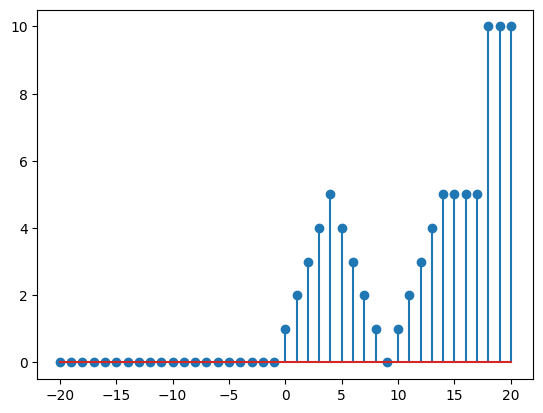

In [19]:
firstd=Rampa(-5+4,-20,20)
firstd[0]*=(first[1]<=0+4)

thirdd=Rampa(5+4,-20,20)
thirdd[0]*=(third[1]<=9+4)

fourthd=escalon(10+4,-20,20)
fourthd[0]*=(fourth[1]<=13+4)

fifthd=escalon(14+4,-20,20)
fifthd[0]*=(fifth[1]<=17+4)

secondd=Rampainver(1+4,-20,20,15-4) 

plt.stem(secondd[1],secondd[0]+firstd[0]+thirdd[0]+5*fourthd[0]+10*fifthd[0])

5.a

<StemContainer object of 3 artists>

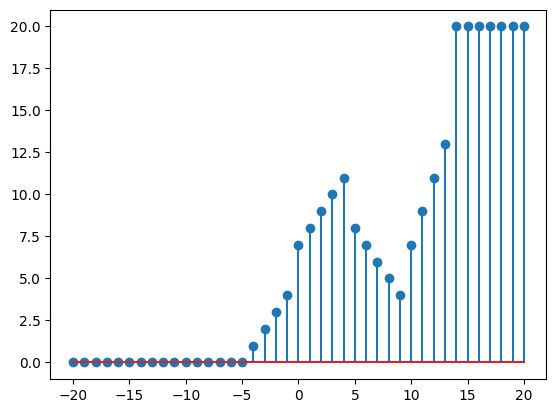

In [20]:
xn=second[0]+first[0]+third[0]+5*fourth[0]+10*fifth[0]
xnd=secondd[0]+firstd[0]+thirdd[0]+5*fourthd[0]+10*fifthd[0]
plt.stem(secondd[1],2*xnd+xn)

x(n+2)

<StemContainer object of 3 artists>

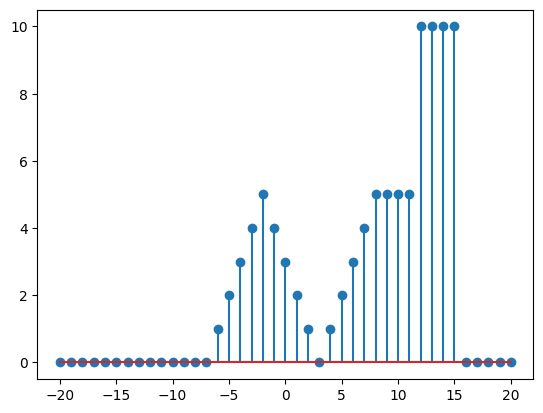

In [21]:
firstd2=Rampa(-5-2,-20,20)
firstd2[0]*=(first[1]<=0-2)

thirdd2=Rampa(5-2,-20,20)
thirdd2[0]*=(third[1]<=9-2)

fourthd2=escalon(10-2,-20,20)
fourthd2[0]*=(fourth[1]<=13-2)

fifthd2=escalon(14-2,-20,20)
fifthd2[0]*=(fifth[1]<=17-2)

secondd2=Rampainver(1-2,-20,20,21-4)

plt.stem(secondd2[1],secondd2[0]+firstd2[0]+thirdd2[0]+5*fourthd2[0]+10*fifthd2[0])

5.b

<StemContainer object of 3 artists>

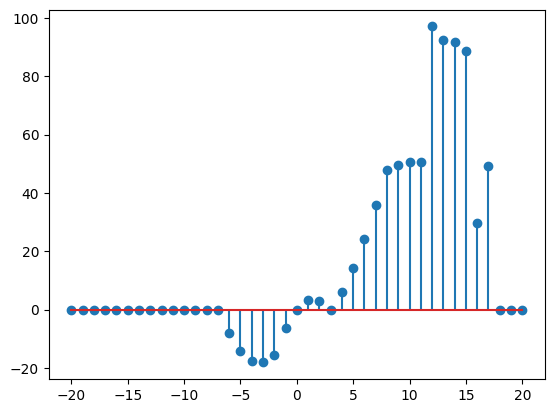

In [22]:
xn=second[0]+first[0]+third[0]+5*fourth[0]+10*fifth[0]
xnd2=secondd2[0]+firstd2[0]+thirdd2[0]+5*fourthd2[0]+10*fifthd2[0]

plt.stem(secondd2[1],0.001*np.exp(0.5*secondd2[1])*xn+10*np.sin(0.05*np.pi*secondd2[1])*xnd2)